## Credit Card Fraud Detection using Python and Machine Learning

### About Credit Card Fraud Detection project:
#### The aim od this project to build a credit card fraud detection model, which tells us if the transaction made by the card is fraud or not. So, this project will use the transaction and their levels as fraud or non-fraud to detect if the new trasaction made by the customer is fraud or not. 

### Challenges that need to face while creating this project:
#### i) a large amount of data is processed every day, the model we have to create must be fast enough to respond to the scam in time.
#### ii) having imbalanced data in which most of the transactions are actual transactions not fraud one which makes it really hard for detecting the fraud ones.
#### iii) Another major issue will be misclassified data, as not every fraudulent transaction is caught and reported.

### How will be tackling these challenges:
#### i) The model we will create will be very simple and fast enough to detect the anomaly and can identify which transaction is actual and which one is fraud. ii) By using proper methods to deal with imbalanced data. iii) For the privacy of the user dataset, we will reduce the dimensionality of the data. iv) A dataset is used from a trustworthy source at least for training the model.


### Dataset:
#### In credit card fraud detection project, we will use the dataset which is a csv file. The dataset consists of transactions that occurred in two days, where there are 492 frauds out of 284,807 transactions. The dataset is highly unbalanced i.e in this most of the transactions are actual transactions not the fraud one.

### Steps that we follow to create this Project is:
#### This project will perform exploratory data analysis on the dataset,After making the dataset ready we will create a model using Machine Learning Algorithm. We are going to use the Logistic Regression method to detect credit card frauds or thers method. At last, we will Train and Evaluate our Logistic Regression model.

In [68]:
# import libraries for Credit Card Fraud Detection Project using Machine Learning:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [69]:
#Loading the dataset to a Pandas Dataframe
credit_card_data = pd.read_csv('creditcard.csv')

In [70]:
# let's see first 3 rows of the dataset:
credit_card_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [71]:
# let's see last 3 rows of the dataset:
credit_card_data.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [72]:
# Let's check the credit card dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [73]:
# Find distribution of Normal or Fraud transaction:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [74]:
# Seperating the Fraud and non-fraud data:
normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

#check the shape"
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [75]:
# Print the amont details for Fraudulent Transaction:
print("The amont details for Fraudulent Transaction:")
fraud.Amount.describe()

The amont details for Fraudulent Transaction:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [76]:
# Print the amont details for Normal Transaction:
print("The amont details for Normal Transaction:")
normal.Amount.describe()

The amont details for Normal Transaction:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

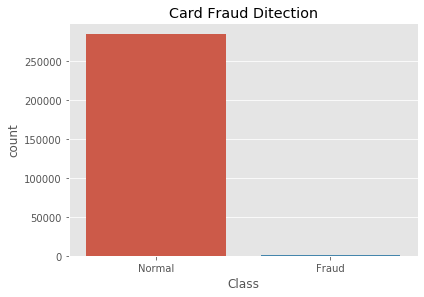

In [77]:
# Visuzlize the normal and fraud data:
labels= ["Normal", "Fraud"]
fig, ax=plt.subplots(figsize=(6, 4))

ax = sns.countplot(x='Class', data=credit_card_data)
plt.tight_layout()
plt.title("Card Fraud Ditection")
plt.xticks(range(2), labels)
plt.show()


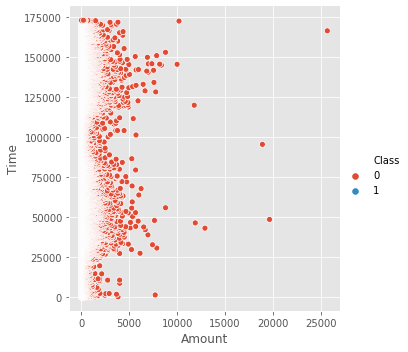

In [78]:
# visualize the data using seaborn:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit_card_data)

In [79]:
# Compare values of both transactions:
credit_card_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [80]:
# Now we will build a sample dataset containing similar distribution of normal transaction and fraud transaction:
normal_sample = normal.sample(n=492)
# Concat two data ( normal_sample and fraud) to create new dataframe which consist equal number of fraud transactions and normal transactions, In this way we balance our dataset (As our dataset is highly unbalanced initially) :
credit_card_new_data = pd.concat([normal_sample, fraud], axis=0)
#Let’s see our new dataset:
credit_card_new_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132599,80046.0,-0.832902,0.857922,0.608929,0.120319,0.385869,0.030978,0.307580,0.377539,-1.411770,...,0.050753,-0.086474,-0.325399,-0.729137,0.314820,1.344454,-0.145922,-0.063048,39.95,0
54816,46632.0,-3.868539,2.756251,-0.115997,0.687327,-1.797525,-0.712658,-0.644017,1.548203,0.424281,...,0.033028,0.414527,-0.341343,0.399428,0.900320,-0.088767,0.398680,0.183403,40.45,0
264661,161524.0,-1.115501,0.852017,-0.159818,-0.860366,1.195866,-1.019150,0.688182,0.314658,-0.559327,...,-0.212951,-0.956315,-0.073430,0.481631,-0.071177,0.081808,-0.078297,0.007704,11.99,0
275911,166788.0,2.128810,-0.945338,-0.739183,-0.583449,-0.613282,0.232029,-0.977273,-0.050288,-0.031279,...,-0.143208,0.237062,0.109746,0.100049,-0.196735,0.760903,-0.008668,-0.039022,34.70,0
47689,43309.0,-0.360539,0.413544,2.421909,1.383790,-0.056363,1.605039,0.569898,-0.010159,0.591652,...,-0.360796,-0.233483,-0.118005,-0.280997,-0.423537,-0.505082,-0.198455,-0.322226,65.21,0


In [81]:
# Analyse our new dataset:
credit_card_new_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

### Splitting the data:

#### After analyzing and visualizing our data, now we will split our dataset in X and Y or say in features and labels:

In [82]:
# Splitting data into features and targets
X = credit_card_new_data.drop('Class', axis=1)
Y = credit_card_new_data['Class']

# splitting the data into training and testing data:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state= 2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(984, 30) (787, 30) (197, 30)
(984,) (787,) (197,)


### Creating Logistic Regression Model:
#### Now we will create the machine learning model.

In [83]:
# Creating Model:
model = LogisticRegression()
# training the Logistic Regression model with training data:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
# Model Evaluation
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print('Accuracy of Training data:', training_data_accuracy)

Accuracy of Training data: 0.9466327827191868


#### As you can see the model we have created gives 95% accuracy on training data. The accuracy is very good as we are training our model on very less data. So on considering that our model accuracy is good.

In [85]:
# classification report of the model on training data:
print(classification_report(X_train_pred, Y_train))

             precision    recall  f1-score   support

          0       0.97      0.92      0.95       415
          1       0.92      0.97      0.95       372

avg / total       0.95      0.95      0.95       787



#### Now evaluating our model on test data:

In [86]:
# accuracy on test data:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('Accuracy of Testing data:', test_data_accuracy)

Accuracy of Testing data: 0.9086294416243654


In [87]:
# confusion matrix and classification report of test data:
print(confusion_matrix(X_test_pred, Y_test))

[[92 11]
 [ 7 87]]


In [88]:
#classification report of test data:
print(classification_report(X_test_pred, Y_test))

             precision    recall  f1-score   support

          0       0.93      0.89      0.91       103
          1       0.89      0.93      0.91        94

avg / total       0.91      0.91      0.91       197



#### As you can see our model accuracy on test data is 92%. So this is all about Credit Card Fraud Detection. This project has created a model which can considerably detect the ‘Normal’ or ‘Fraud’ Transaction accurately and efficiently.